# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,MaxAbsScaler,MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

In [3]:
heart=pd.read_csv(r"C:\Users\GCE DATA\Desktop\Niyas DSA\heart.csv")
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
heart.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [6]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

| Column Name        | Meaning                                                      | Clinical Relevance                                                                                                                                                   |
| ------------------ | ------------------------------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Age**            | Age of the patient in years                                  | Increasing age raises the risk of cardiovascular diseases.                                                                                                           |
| **Sex**            | Biological sex of the patient. Usually: M = Male, F = Female | Males generally have higher risk of heart disease than females.                                                                                                      |
| **ChestPainType**  | Type of chest pain experienced                               | Used to evaluate severity and likelihood of angina: <br>• TA: Typical Angina <br>• ATA: Atypical Angina <br>• NAP: Non–Anginal Pain <br>• ASY: Asymptomatic          |
| **RestingBP**      | Blood pressure in mm Hg while resting                        | High resting blood pressure (hypertension) increases cardiac risk.                                                                                                   |
| **Cholesterol**    | Serum cholesterol level in mg/dL                             | High cholesterol leads to plaque buildup in arteries.                                                                                                                |
| **FastingBS**      | Fasting blood sugar > 120 mg/dL: 1 = Yes, 0 = No             | A value of 1 may indicate diabetes, which is linked to higher heart disease risk.                                                                                    |
| **RestingECG**     | Electrocardiogram results at rest                            | Shows heart electrical activity, identifies abnormalities. Categories commonly: <br>• Normal <br>• ST: ST–T wave abnormality <br>• LVH: Left Ventricular Hypertrophy |
| **MaxHR**          | Maximum heart rate achieved during exercise test             | Lower MaxHR can indicate heart performance limitations.                                                                                                              |
| **ExerciseAngina** | Exercise-induced angina (pain): Y = Yes, N = No              | Indicates whether exercise triggers chest pain.                                                                                                                      |
| **Oldpeak**        | ST depression induced by exercise, relative to rest          | Higher values indicate myocardial ischemia (reduced blood flow).                                                                                                     |
| **ST_Slope**       | Slope of the ST segment during peak exercise                 | Used in diagnosing ischemia: <br>• Up: Upsloping <br>• Flat: Flat <br>• Down: Downsloping                                                                            |
| **HeartDisease**   | Presence of heart disease: 1 = Yes, 0 = No                   | This is the label for the classification problem.                                                                                                                    |


In [7]:
for i in heart:
    print(f'\n\n\n{i} :\n',heart[i].unique())
    print(heart[i].nunique())




Age :
 [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
50



Sex :
 ['M' 'F']
2



ChestPainType :
 ['ATA' 'NAP' 'ASY' 'TA']
4



RestingBP :
 [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
67



Cholesterol :
 [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290

While checking the unique of the Dataset there is 0 inthe columns ' RestingBp ' , ' Cholesterol ' (there is not possible).

In [8]:
heart['RestingBP'].replace(0, np.nan, inplace=True)
heart['Cholesterol'].replace(0, np.nan, inplace=True)
heart.loc[heart['Oldpeak'] < 0, 'Oldpeak'] = np.nan


C:\Users\GCE DATA\AppData\Local\Temp\ipykernel_7452\3003038898.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart['RestingBP'].replace(0, np.nan, inplace=True)
C:\Users\GCE DATA\AppData\Local\Temp\ipykernel_7452\3003038898.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



So that we will take that as null values

In [9]:
heart.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak            13
ST_Slope            0
HeartDisease        0
dtype: int64

In [10]:
col=['RestingBP','Cholesterol','Oldpeak']
for i in col:
    heart[i]=heart[i].fillna(heart[i].median())

And Handle it with respect to the ***median*** of the each column

In [11]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# DATA VISUALISATION 

# UNIVARIATE

#### COUNT PLOT

<Axes: xlabel='ChestPainType', ylabel='count'>

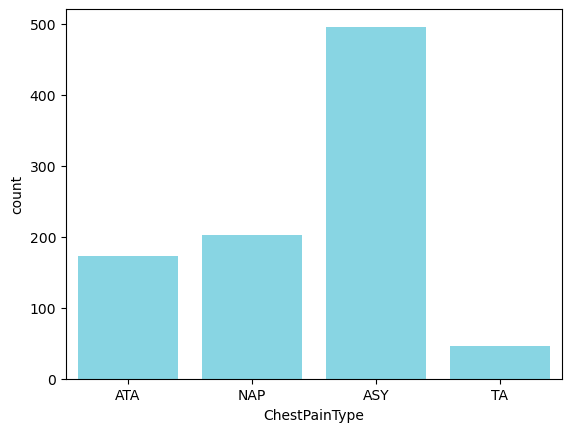

In [12]:

sns.countplot(x='ChestPainType', data=heart,color='#79DFF2')

The chart shows that the ASY chest pain type occurs most frequently, while TA occurs the least in the dataset.

### HISTOGRAM

Text(0.5, 1.0, 'Age Distribution')

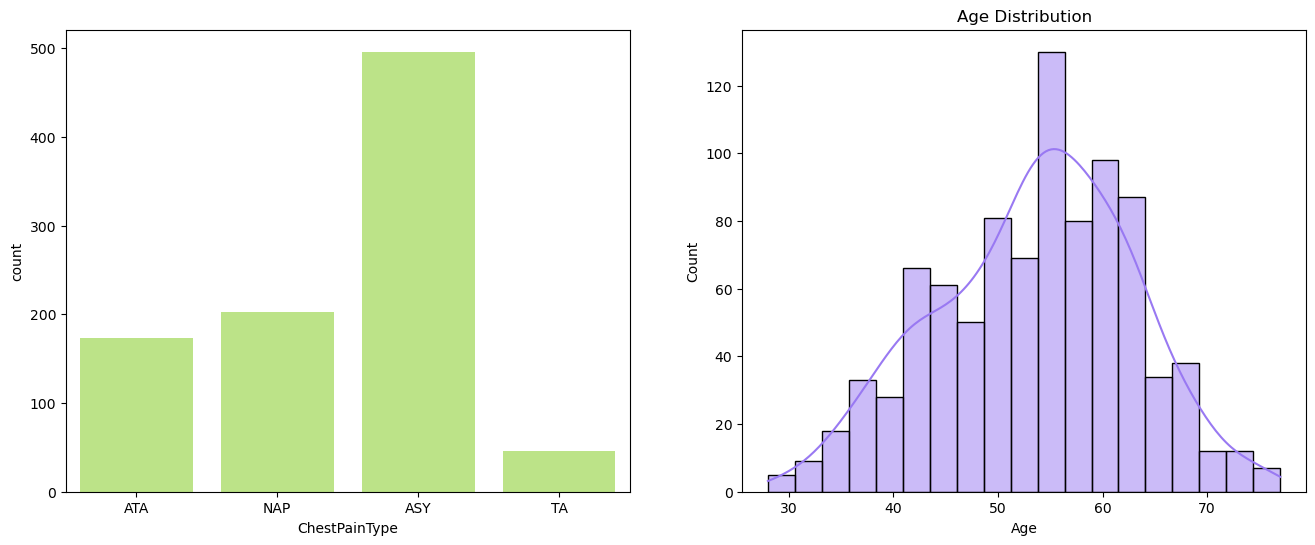

In [13]:

ig, axes=plt.subplots(1,2, figsize=(16,6))
sns.countplot(x='ChestPainType', data=heart,color="#BEF279",ax=axes[0])
plt.title('Chest Pain Type')
sns.histplot(heart['Age'], kde=True,color="#9979F2",ax=axes[1])
plt.title('Age Distribution')


- **Chest Pain Type Count Plot:** 
The plot shows that ASY is the most common chest pain type, while TA is the least common.


- **Age Distribution Histogram:** 
The plot shows that most patients fall within the middle-aged group, with ages clustering around 50 to 60 years.

# BI-VARIATE

#### BAR PLOT

<Axes: xlabel='ChestPainType', ylabel='HeartDisease'>

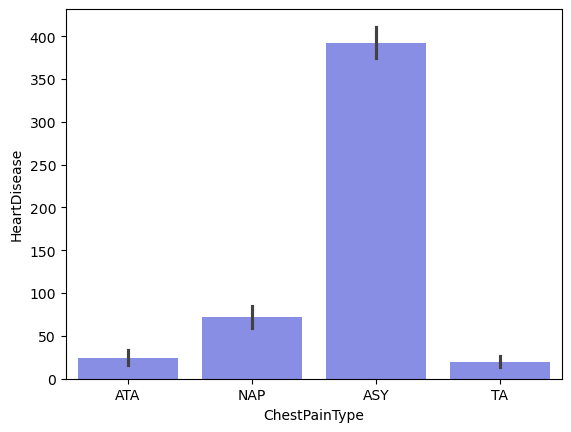

In [14]:
sns.barplot(x='ChestPainType', y='HeartDisease', data=heart, estimator=sum, color="#7981F2")

Patients with asymptomatic chest pain (ASY) show the highest number of heart disease cases compared to other chest pain types.

## SUB PLOT 

#### __BOX PLOT____SCATTER PLOT____VIOLIN PLOT____PIE CHART__

Text(0, 0.5, '')

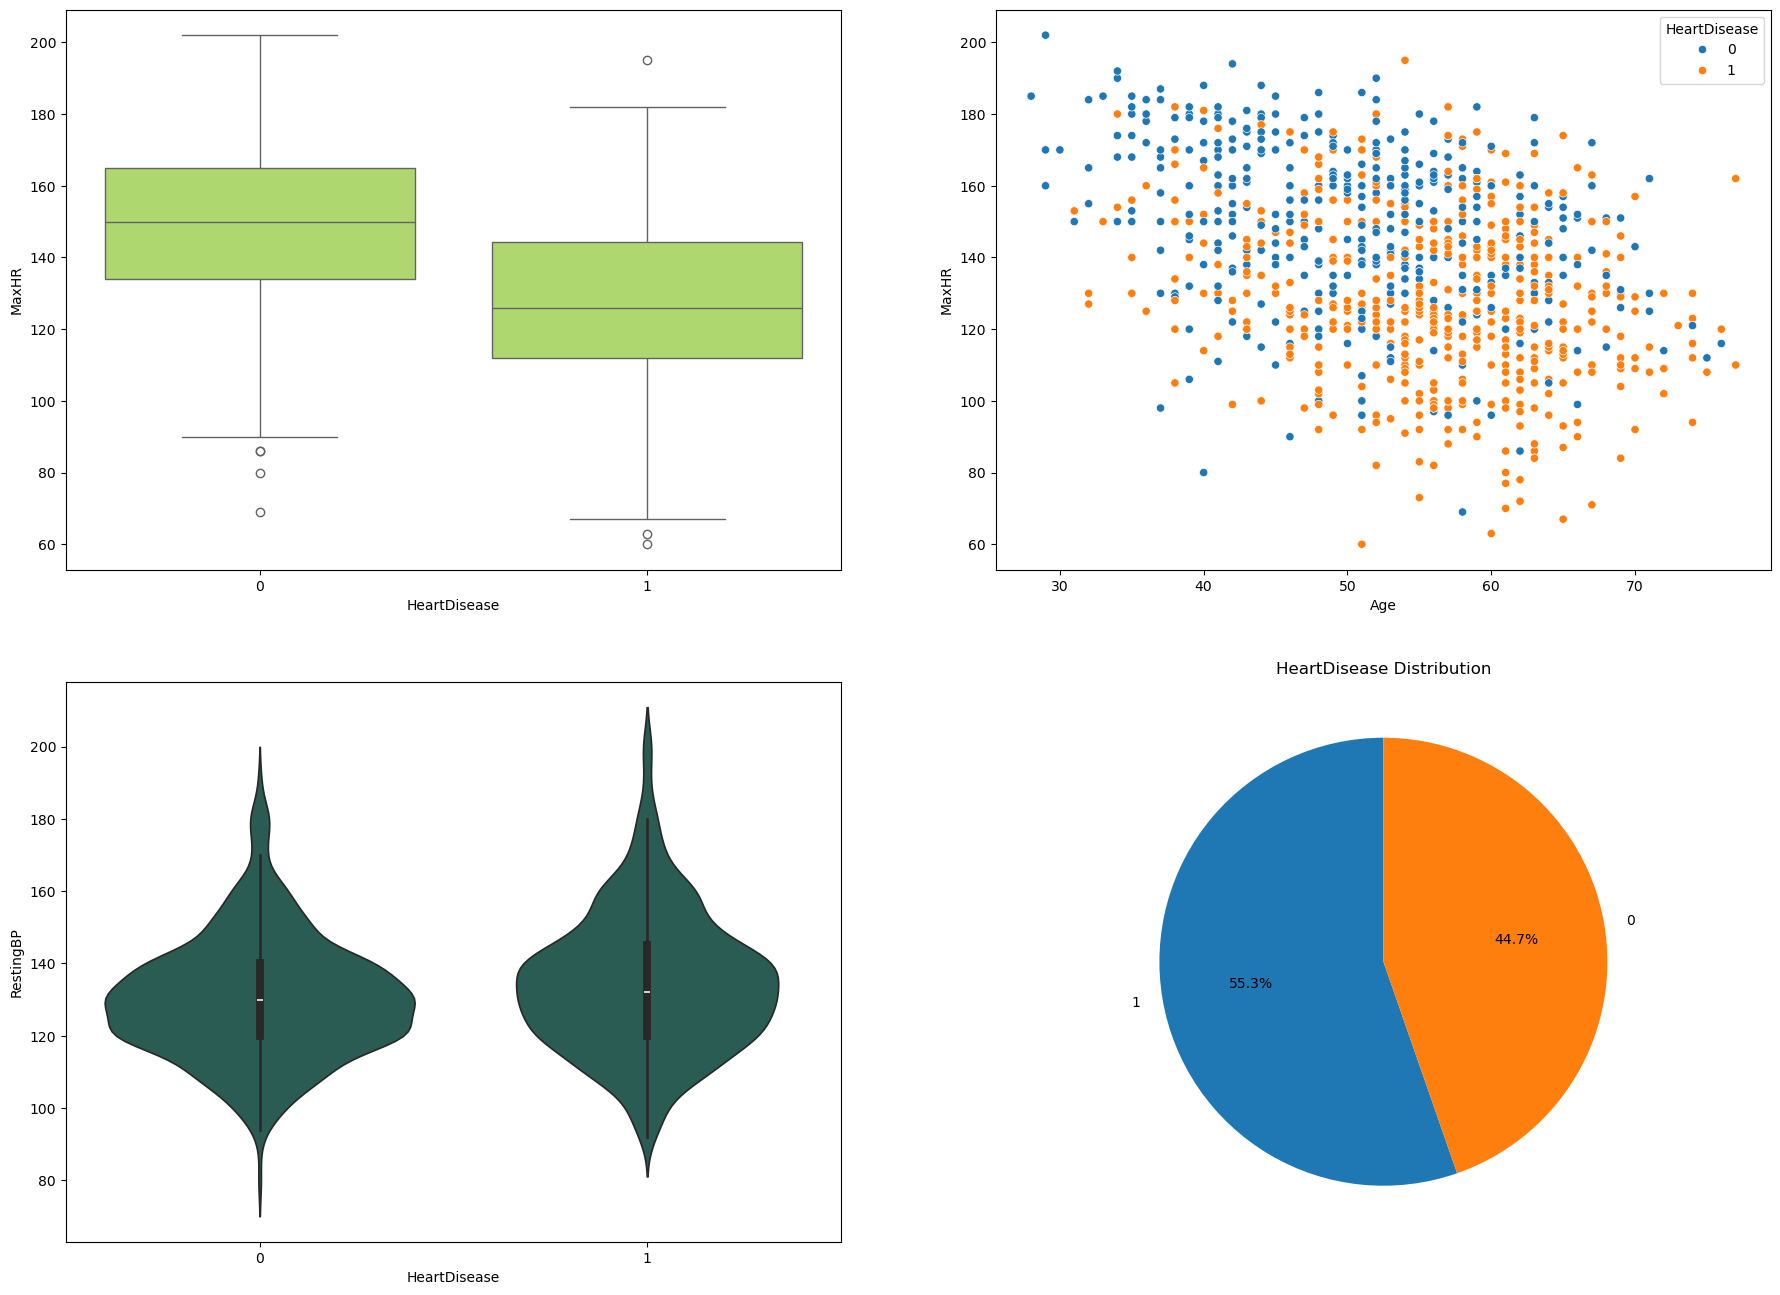

In [15]:
igbi, axesbi=plt.subplots(2,2, figsize=(22,16))

sns.boxplot(x='HeartDisease', y='MaxHR', data=heart,color="#B1E85F",ax=axesbi[0,0])
plt.title('Max Heart Rate vs Heart Disease')

sns.scatterplot(x='Age', y='MaxHR', hue='HeartDisease', data=heart,color="#A52B95",ax=axesbi[0,1])
plt.title('Age vs Max Heart Rate')

sns.violinplot(x='HeartDisease', y='RestingBP', data=heart,color="#226459",ax=axesbi[1,0])
plt.title('Resting Blood Pressure vs Heart Disease')

heart['HeartDisease'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,ax=axesbi[1,1])
plt.title('HeartDisease Distribution')
plt.ylabel('')

This figure presents four different visual analyses related to heart disease:

1. **Boxplot** (Top-Left): MaxHR vs HeartDisease

  - Shows that patients diagnosed with heart disease (HeartDisease = 1) generally have lower maximum heart rate values.

  - There are some outliers on both sides.

  - Reduced MaxHR may indicate poorer cardiovascular response during exercise.

2. **Scatter Plot** (Top-Right): Age vs MaxHR

  - Displays a negative relationship between age and maximum heart rate.

  - Older individuals tend to have a lower heart rate capacity.

  - Heart disease cases (orange) are more concentrated in older age and lower MaxHR regions.

3. **Violin Plot** (Bottom-Left): RestingBP vs HeartDisease

  - Shows the distribution and density of RestingBP across both classes.

  - Both diseased and non-diseased groups show similar patterns.

  - Resting blood pressure does not strongly differentiate heart disease cases.

4. **Pie Chart** (Bottom-Right): HeartDisease Distribution

  - Indicates that 55.3% of individuals have heart disease while 44.7% do not.

  - The dataset has a slightly imbalanced class distribution favoring positive cases.

| Feature            | Useful for prediction | Key observation                                                 |
| ------------------ | --------------------- | --------------------------------------------------------------- |
| MaxHR              | ✅ Yes                 | Strong separation between healthy and diseased groups           |
| Age                | ✅ Yes                 | Older age is linked with lower MaxHR and higher disease chances |
| RestingBP          | ❌ Weak                | Similar distribution in both groups                             |
| HeartDisease ratio | —                     | Positive cases slightly higher                                  |


# MULTI-VARIATE

Text(0.5, 1.0, 'Correlation Heatmap')

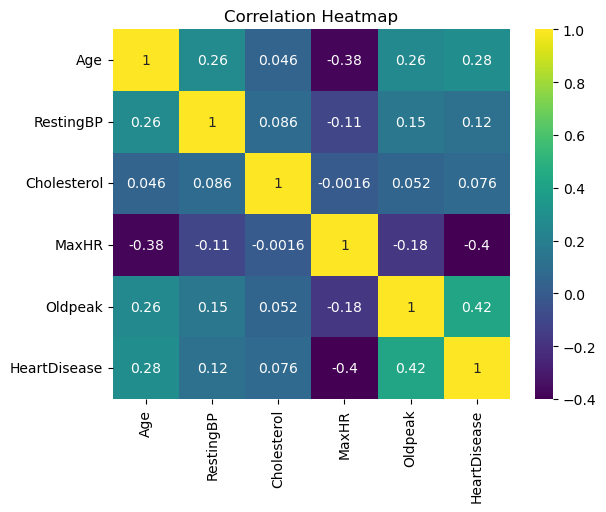

In [16]:
sns.heatmap(heart[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak','HeartDisease']].corr(),annot=True, cmap='viridis')
plt.title('Correlation Heatmap')

This heatmap shows the pairwise correlation between the numerical features in the heart disease dataset.
Correlation values range from −1 to +1, where:

- Positive correlation indicates that both variables increase together.

- Negative correlation indicates that one increases while the other decreases.

- Values near 0 indicate weak or no linear relationship.

| Feature Relationship        | Correlation | Interpretation                                                         |
| --------------------------- | ----------- | ---------------------------------------------------------------------- |
| **HeartDisease vs MaxHR**   | **−0.40**   | Patients with heart disease tend to have **lower maximum heart rate**. |
| **HeartDisease vs Oldpeak** | **+0.42**   | Higher ST depression values are strongly linked with heart disease.    |
| **HeartDisease vs Age**     | **+0.28**   | Older age is associated with higher chance of heart disease.           |
| RestingBP vs HeartDisease   | +0.12       | Weak association.                                                      |
| Cholesterol vs HeartDisease | +0.08       | Very weak relationship.                                                |


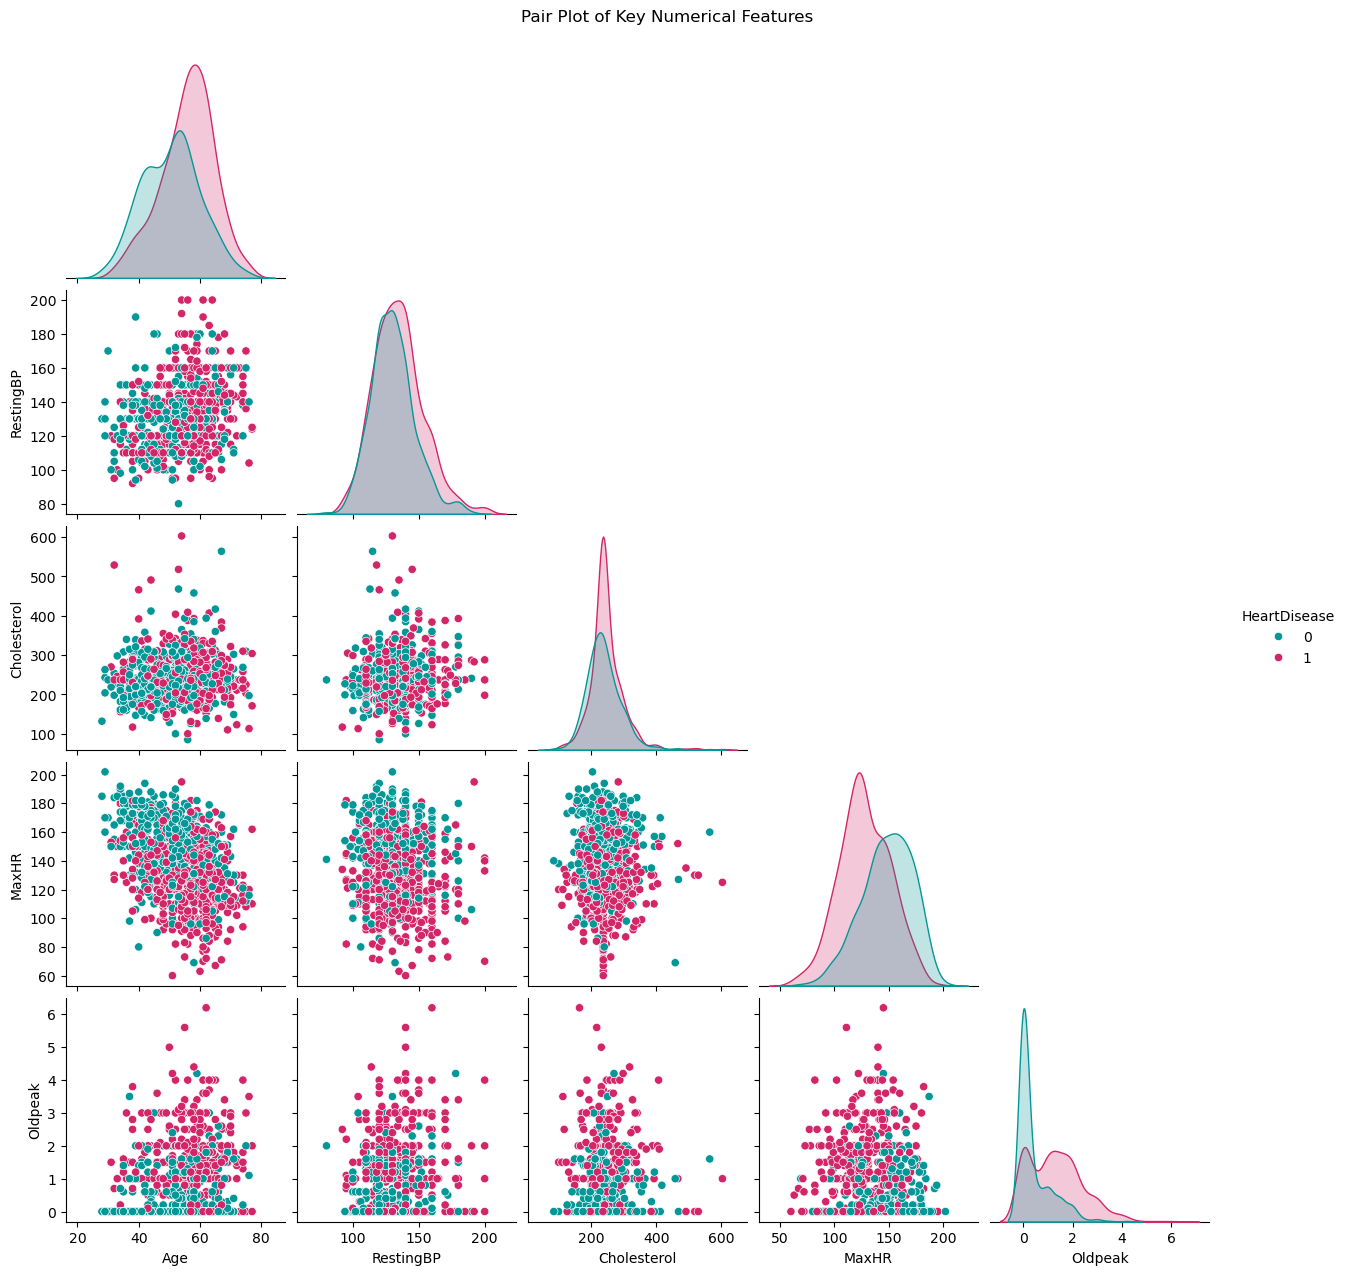

In [17]:
sns.pairplot(heart[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak','HeartDisease']],hue='HeartDisease',corner=True,diag_kind='kde',palette=["#049797","#d32668"])

plt.suptitle('Pair Plot of Key Numerical Features', y=1.02)
plt.show()

This pair plot visualizes the relationships between the main numerical attributes in the heart disease dataset, separated by HeartDisease = 0 (No disease) and 1 (Disease present). Each diagonal plot shows the distribution of a feature using KDE curves, while the scatter plots show how two features relate to each other.

### **Key observations:**

**MaxHR (Maximum Heart Rate):-**

People with heart disease tend to have lower MaxHR values.

Clear separation is visible in the distribution.

**Oldpeak:-**

Higher Oldpeak values are more common among those with heart disease.

Suggests ST depression during exercise is a strong risk factor.

**Age:-**

Slight trend toward older ages for heart disease cases.

Distribution overlap still exists.

**RestingBP and Cholesterol:-**

These features show large overlap between both classes.

Weak individual separation for predicting disease.

**Scatter relationships**

No major linear correlations.

MaxHR and Age:- show a negative trend (expected: older people have lower heart rate capacity).

****MaxHR	        :-  Strong separation, useful in prediction****

****Oldpeak	        :-  Strong indication of disease****

****Age	            :-  Small effect****

****RestingBP	    :-  Weak signal****

****Cholesterol	    :-  Weak signal with outliers****

# ENCODING

Changing text or categorical data into numbers using **ENCODING** so that the computer can understand and use them in machine learning models.
In our dataset, some columns contain words like “Male”, “Female”, “ATA”, “NAP”, etc. These must be converted into numeric form before model building.

### LABEL ENCODING

In [18]:
le=LabelEncoder()
col=['Sex','FastingBS','ExerciseAngina']
for i in col:
    heart[i]=le.fit_transform(heart[i])

Columns: Sex, FastingBS, and ExerciseAngina.

Converts each category into a number.

Example: “Male” → 1, “Female” → 0.

This is simple and best when the column has only two values.

### ORDINAL ENCODING

In [19]:
col1=['Down','Flat','Up']
col2=['ASY', 'NAP', 'ATA', 'TA']
oe=OrdinalEncoder(categories=[col1,col2])
heart[['ST_Slope','ChestPainType']]=oe.fit_transform(heart[['ST_Slope','ChestPainType']])

Columns: ST_Slope and ChestPainType.

These have an order (for example, “Down”, “Flat”, “Up”).

Each level is given a number according to its order.

Example: “Down” = 0, “Flat” = 1, “Up” = 2.

### ONE HOT ENCODING

In [20]:
ohe=OneHotEncoder(sparse_output=False)
encoded_data = ohe.fit_transform(heart[['RestingECG']])
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(['RestingECG']))
heart= pd.concat([heart.drop(columns='RestingECG'), encoded_df], axis=1)

Column: RestingECG.

Creates new columns for each unique value in RestingECG.

Example: if values are “Normal”, “ST”, “LVH”, it creates three columns like
RestingECG_Normal, RestingECG_ST, RestingECG_LVH with 0 or 1 values.

This method is useful when there is no order between the categories.

In [21]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,2.0,140.0,289.0,0,172,0,0.0,2.0,0,0.0,1.0,0.0
1,49,0,1.0,160.0,180.0,0,156,0,1.0,1.0,1,0.0,1.0,0.0
2,37,1,2.0,130.0,283.0,0,98,0,0.0,2.0,0,0.0,0.0,1.0
3,48,0,0.0,138.0,214.0,0,108,1,1.5,1.0,1,0.0,1.0,0.0
4,54,1,1.0,150.0,195.0,0,122,0,0.0,2.0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3.0,110.0,264.0,0,132,0,1.2,1.0,1,0.0,1.0,0.0
914,68,1,0.0,144.0,193.0,1,141,0,3.4,1.0,1,0.0,1.0,0.0
915,57,1,0.0,130.0,131.0,0,115,1,1.2,1.0,1,0.0,1.0,0.0
916,57,0,2.0,130.0,236.0,0,174,0,0.0,1.0,1,1.0,0.0,0.0


Here all data becomes numerical, it helps the Logistic Regression model understand patterns better and make accurate predictions.

# SCALING

HERE "ROBUSTSCALER" IS BEST BEACUSE OUTLIERS ARE NOT HANDLED 

In [22]:
scalar=RobustScaler()
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
heart[num_cols] = scalar.fit_transform(heart[num_cols])
scaled_data = scalar.fit_transform(heart[num_cols])
scaled_df = pd.DataFrame(scaled_data, columns=num_cols)
heart[num_cols] = scaled_df

In [23]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,-1.076923,1,2.0,0.5,0.981132,0,0.944444,0,-0.400000,2.0,0,0.0,1.0,0.0
1,-0.384615,0,1.0,1.5,-1.075472,0,0.500000,0,0.266667,1.0,1,0.0,1.0,0.0
2,-1.307692,1,2.0,0.0,0.867925,0,-1.111111,0,-0.400000,2.0,0,0.0,0.0,1.0
3,-0.461538,0,0.0,0.4,-0.433962,0,-0.833333,1,0.600000,1.0,1,0.0,1.0,0.0
4,0.000000,1,1.0,1.0,-0.792453,0,-0.444444,0,-0.400000,2.0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.692308,1,3.0,-1.0,0.509434,0,-0.166667,0,0.400000,1.0,1,0.0,1.0,0.0
914,1.076923,1,0.0,0.7,-0.830189,1,0.083333,0,1.866667,1.0,1,0.0,1.0,0.0
915,0.230769,1,0.0,0.0,-2.000000,0,-0.638889,1,0.400000,1.0,1,0.0,1.0,0.0
916,0.230769,0,2.0,0.0,-0.018868,0,1.000000,0,-0.400000,1.0,1,1.0,0.0,0.0


After using RobustScaler, all the numeric values in your dataset are scaled to a similar range. This means big numbers and small numbers are now balanced — for example, blood pressure and cholesterol won’t dominate smaller values like “oldpeak.”

RobustScaler also reduces the effect of outliers (unusual extreme values), so this model can learn more fairly from all data points.

# MODEL BUILDING

In [24]:
x=heart.drop('HeartDisease',axis=1)
y=heart['HeartDisease']
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,-1.076923,1,2.0,0.5,0.981132,0,0.944444,0,-0.400000,2.0,0.0,1.0,0.0
1,-0.384615,0,1.0,1.5,-1.075472,0,0.500000,0,0.266667,1.0,0.0,1.0,0.0
2,-1.307692,1,2.0,0.0,0.867925,0,-1.111111,0,-0.400000,2.0,0.0,0.0,1.0
3,-0.461538,0,0.0,0.4,-0.433962,0,-0.833333,1,0.600000,1.0,0.0,1.0,0.0
4,0.000000,1,1.0,1.0,-0.792453,0,-0.444444,0,-0.400000,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.692308,1,3.0,-1.0,0.509434,0,-0.166667,0,0.400000,1.0,0.0,1.0,0.0
914,1.076923,1,0.0,0.7,-0.830189,1,0.083333,0,1.866667,1.0,0.0,1.0,0.0
915,0.230769,1,0.0,0.0,-2.000000,0,-0.638889,1,0.400000,1.0,0.0,1.0,0.0
916,0.230769,0,2.0,0.0,-0.018868,0,1.000000,0,-0.400000,1.0,1.0,0.0,0.0


"HeartDisease" is the target column thats why it is droped from that

In [25]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
model=LogisticRegression()

In [28]:
model=model.fit(x_train,y_train)

In [29]:
y_pred=model.predict(x_test)

# ACCURACY

In [30]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.842391304347826

Accuracy = 0.84239, which means your model correctly predicted about 84.24% of the test data.

In simple words:
model performs well, correctly predicting most of the cases — around 86 out of every 100 predictions are right.

# PREDICTION

In [31]:
new_df=[[-0.461538,0,0.0,0.4,-0.433962,0,-0.833333,1,0.600000,1.0,0.0,1.0,0.0]]
predicted=model.predict(new_df)
predicted

c:\Users\GCE DATA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])